In [138]:
#EDA (EXPLORATORY DATA ANALYSIS)
import pandas as pd;
#LOADING DATA FROM CSV
df = pd.read_csv('mprice.csv')
#EDA
#Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
import re


In [139]:

# Clean and rename columns
df.columns = df.columns.str.strip().str.replace(" ", "")
df = df.rename(columns={'Price($)': 'Price',
                        'ScreenSize(inches)': 'ScreenSize',
                        'Camera(MP)': 'Camera',
                        'BatteryCapacity(mAh)': 'BatteryCapacity'})

In [140]:
#Price is not always number, sometimes is a string like '$550', so we need to prepare data 
def convert_to_numeric(value):
    try:
        return pd.to_numeric(value)
    except ValueError:
        # remove the "$" sign and try again
        return pd.to_numeric(value.replace('$', ''), errors='coerce')

df['Price'] = df['Price'].apply(convert_to_numeric)

             

In [141]:
#Converting camera values to nums, removing MP string, and creating new
#column with sums of all megapixels 
#(not the best way to see camera quality, but i will use this aproach as an example)

df['Camera'] = df['Camera'].str.replace('MP', '')
cameras = df['Camera'].str.split('+')
sums = cameras.apply(lambda x: sum(float(part) for part in x))
df['CameraSum'] = sums



In [142]:
#RAM, Storage, ScreenSize to numeric dtype
df["Storage"] = [int(re.findall(r'\d+', value)[0]) for value in df["Storage"].values]
df["RAM"] = [int(re.findall(r'\d+', value)[0]) for value in df["RAM"].values]
df["ScreenSize"] = [float(re.findall(r'\d+\.*\d*', value)[0]) for value in df["ScreenSize"].values]

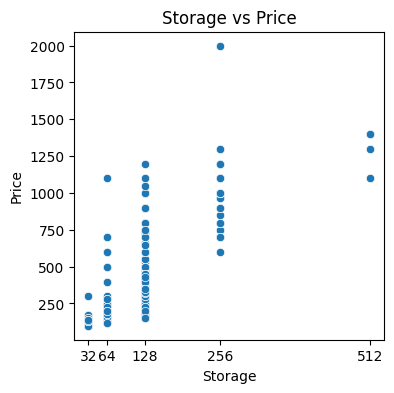

In [143]:
#PLT FOR PRICE VS STORAGE

plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='Storage', y='Price')
plt.title('Storage vs Price')
plt.xlabel('Storage')
plt.ylabel('Price')
plt.xticks([32,64,128, 256, 512])
plt.show()



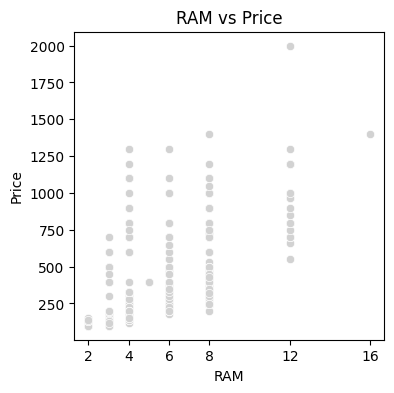

In [144]:

#PLT FOR PRICE VS RAM
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='RAM', y='Price', color='#d2d2d2')
plt.title('RAM vs Price')
plt.xlabel('RAM')
plt.ylabel('Price')
plt.xticks([2, 4, 6, 8, 12, 16])

plt.show()

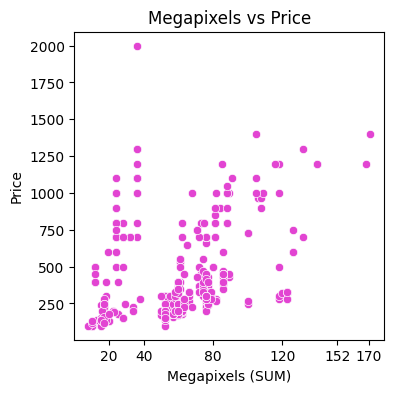

In [145]:

#PLT FOR PRICE VS MEGAPIXELS
plt.figure(figsize=(4, 4))
sns.scatterplot(data=df, x='CameraSum', y='Price', color='#e244d2')
plt.title('Megapixels vs Price')
plt.xlabel('Megapixels (SUM)')
plt.ylabel('Price')
plt.xticks([20, 40, 80, 120, 152, 170])

plt.show()

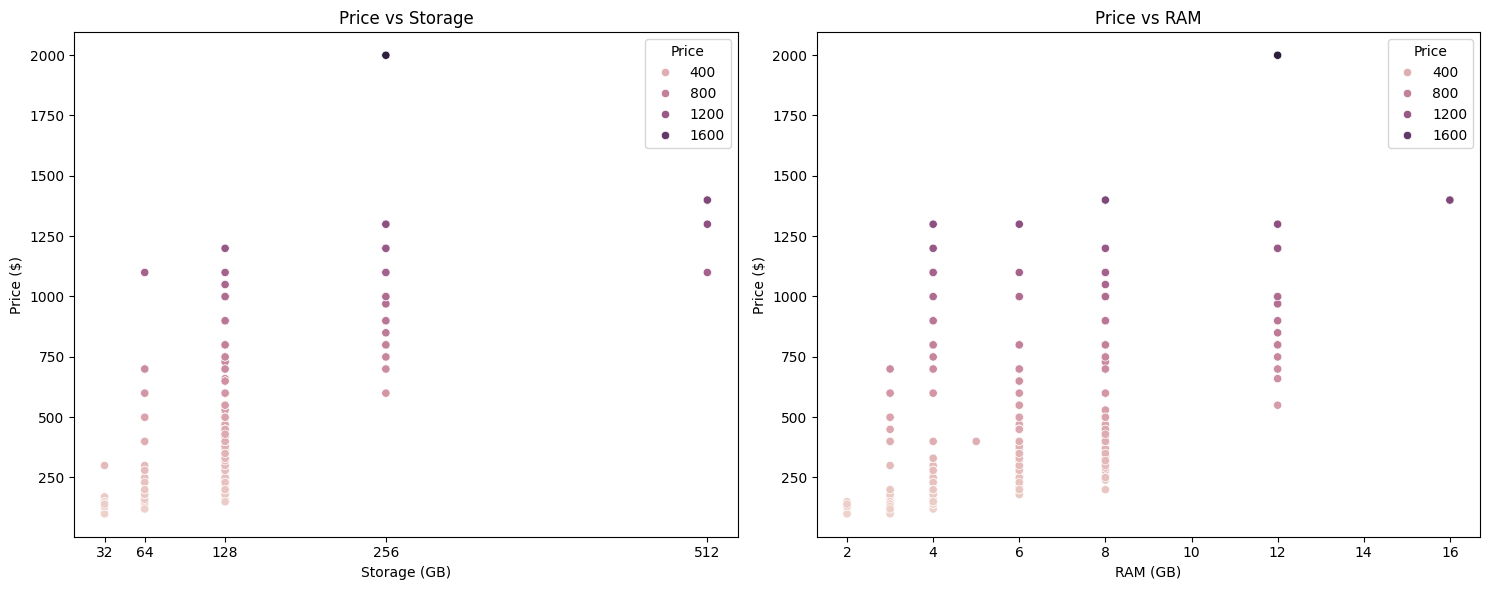

In [146]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.scatterplot(data=df, x='Storage', y='Price', hue='Price')
plt.title('Price vs Storage')
plt.xlabel('Storage (GB)')
plt.ylabel('Price ($)')
plt.xticks([32, 64, 128, 256, 512])

# Create pairplot for 'Price ($)' vs 'RAM'
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='RAM', y='Price', hue='Price')
plt.title('Price vs RAM')
plt.xlabel('RAM (GB)')
plt.ylabel('Price ($)')

plt.tight_layout()
plt.show()

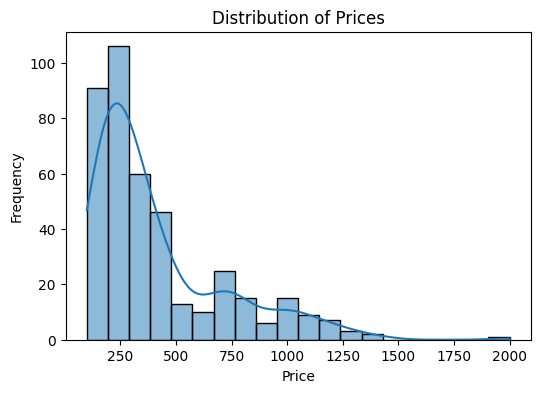

In [147]:
plt.figure(figsize=(6, 4))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


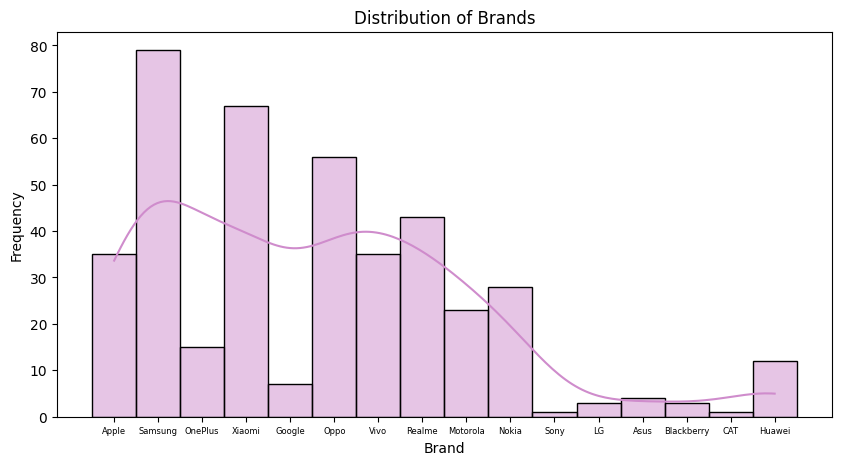

In [148]:
#BRAND DISTRIBUTION
plt.figure(figsize=(10, 5))
sns.histplot(df['Brand'], bins=20, kde=True, color='#cf8ccc')
plt.title('Distribution of Brands')
plt.xlabel('Brand')
plt.ylabel('Frequency')
plt.xticks(fontsize=6) 
plt.show()

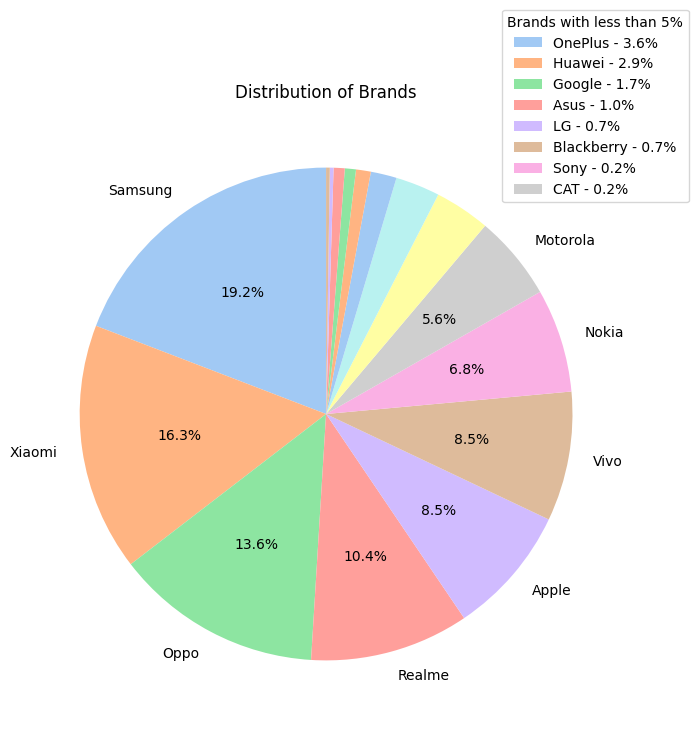

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#frequencies for each brand
brand_counts = df['Brand'].value_counts()

# Filter out items with more than 5%
filtered_brands = brand_counts[brand_counts / len(df) > 0.05]

# Filter brand_counts to include only brands with 5% or more
brand_counts_filtered = brand_counts[brand_counts.index.isin(filtered_brands.index)]

# Plotting pie chart with labels for all brands
plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(brand_counts, labels=brand_counts.index, autopct='%1.1f%%', colors=sns.color_palette("pastel"), startangle=90)

#hiding labels for items with less than 5%
for i, brand in enumerate(brand_counts.index):
    if brand not in filtered_brands.index:
        texts[i].set_text('')
for i, brand in enumerate(brand_counts.index):
    if brand in filtered_brands.index:
        autotexts[i].set_text(f'{brand_counts[brand]/len(df)*100:.1f}%')
    else:
        autotexts[i].set_text('')

#legend for items with less than 5%
legend_labels = [f'{brand} - {brand_counts[brand]/len(df)*100:.1f}%' for brand in brand_counts.index if brand not in filtered_brands.index]
plt.legend(legend_labels, title='Brands with less than 5%', loc='right', bbox_to_anchor=(1.1, 1))

plt.title('Distribution of Brands')
plt.show()


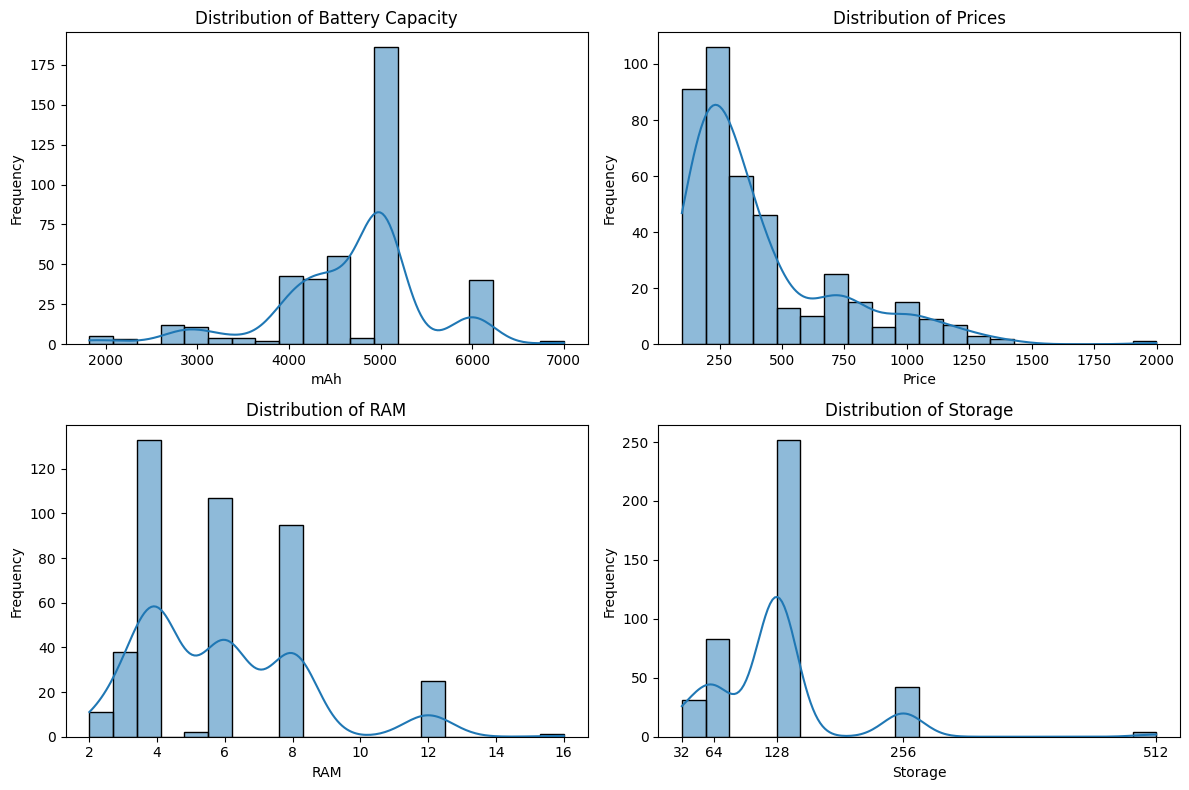

In [150]:


fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot 1: Distribution of Battery Capacity
sns.histplot(df['BatteryCapacity'], bins=20, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Battery Capacity')
axes[0, 0].set_xlabel('mAh')
axes[0, 0].set_ylabel('Frequency')

# Plot 2: Distribution of Prices
sns.histplot(df['Price'], bins=20, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Prices')
axes[0, 1].set_xlabel('Price')
axes[0, 1].set_ylabel('Frequency')

# Plot 3: Distribution of RAM 
sns.histplot(df['RAM'], bins=20, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of RAM')
axes[1, 0].set_xlabel('RAM')
axes[1, 0].set_ylabel('Frequency')

# Plot 3: Distribution of Storage 
sns.histplot(df['Storage'], bins=20, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Storage')
axes[1, 1].set_xlabel('Storage')
axes[1, 1].set_ylabel('Frequency')

axes[1, 1].set_xticks([32, 64, 128,256,512])


plt.tight_layout()  # Adjust layout for better spacing
plt.show()


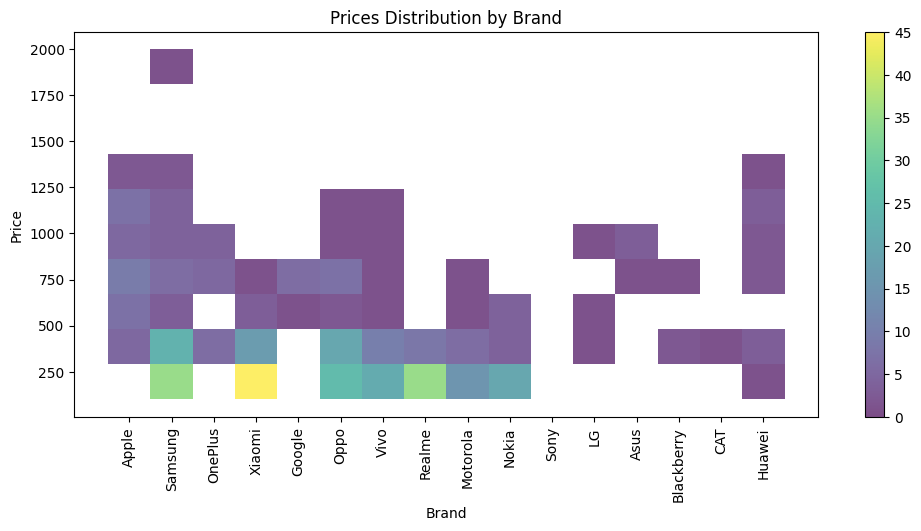

In [151]:
#Pricing by brand
plt.figure(figsize=(12, 5))
sns.histplot(data=df, x='Brand', y='Price', bins=10, cbar=True, cmap='viridis', kde=True, alpha=0.7)
plt.title('Prices Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Price')
plt.xticks(rotation=90, ha='center') #for better visability
plt.show()
#data is bit old, there is no samsung and iphone that costs around 250$ in 2024
#i added some phones by myself in csv for better data display

In [152]:
df.head(10)

,Brand,Model,Storage,RAM,ScreenSize,Camera,BatteryCapacity,Price,CameraSum
0,Apple,iPhone 13 Pro,128,6,6.10,12 + 12 + 12,3095,999.0,36.0
1,Samsung,Galaxy S21 Ultra,256,12,6.80,108 + 10 + 10 + 12,5000,1199.0,140.0
2,OnePlus,9 Pro,128,8,6.70,48 + 50 + 8 + 2,4500,899.0,108.0
3,Xiaomi,Redmi Note 10 Pro,128,6,6.67,64 + 8 + 5 + 2,5020,279.0,79.0
4,Google,Pixel 6,128,8,6.40,50 + 12.2,4614,799.0,62.2
5,Apple,iPhone 13,128,4,6.10,12 + 12,2815,799.0,24.0
6,Apple,iPhone 14,128,4,6.10,12 + 12,2815,899.0,24.0
7,Apple,iPhone 15 Pro,128,4,6.10,12 + 12,2815,999.0,24.0
8,Apple,iPhone 15 Pro,256,4,6.10,12 + 12 + 12,2815,1099.0,36.0
9,Apple,iPhone 15 Pro Max,256,4,6.10,12 + 12 + 12,2815,1199.0,36.0


In [153]:
#sklearn is deprecated, so i installed scikit-learn, but it did not work with cli & pip3
#"No module sklearn found!"
#but with this command it works with warning, im using mac os sonoma 14.3
#import sys
#!{sys.executable} -m pip install sklearn

from sklearn.model_selection import train_test_split

In [154]:
type(df)

pandas.core.frame.DataFrame

In [155]:
X = df[['RAM', 'Storage']].values
type(X)

numpy.ndarray

In [156]:
y = df['Price'].values
type(y)

numpy.ndarray

In [157]:
X.shape


(412, 2)

In [158]:
y.shape

(412,)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=17)

In [160]:
from sklearn.preprocessing import MinMaxScaler


In [161]:
scaler = MinMaxScaler()

In [162]:
scaler.fit(X_train)

MinMaxScaler()

In [163]:
X_train = scaler.transform(X_train)

In [164]:
X_test = scaler.transform(X_test)

In [165]:
X_train.max()

1.0

In [166]:
X_train.min()

0.0

In [167]:
#import sys
#!{sys.executable} -m pip install tensorflow
#Samo ovako uspeva instalacija, kao i malopre, probao sam kroz 
#terminal, koristeci pip3 i anakondu, ne preponzaje modul
#predpostavljam da je do sistema i m1 procesora
#prikazuje problem, ali funkcionise.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation


In [168]:
#model = Sequential([Dense(units=2), Dense(units=2), Dense(units =2)])

In [169]:
model = Sequential()
model.add(Dense(4, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(4,activation='relu'))

#output
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


9/9 [==============================] - 0s 641us/step - loss: nan  
Epoch 2/100
9/9 [==============================] - 0s 550us/step - loss: nan
Epoch 3/100
9/9 [==============================] - 0s 601us/step - loss: nan
Epoch 4/100
9/9 [==============================] - 0s 557us/step - loss: nan
Epoch 5/100
9/9 [==============================] - 0s 502us/step - loss: nan
Epoch 6/100
9/9 [==============================] - 0s 524us/step - loss: nan
Epoch 7/100
9/9 [==============================] - 0s 519us/step - loss: nan
Epoch 8/100
9/9 [==============================] - 0s 506us/step - loss: nan
Epoch 9/100
9/9 [==============================] - 0s 550us/step - loss: nan
Epoch 10/100
9/9 [==============================] - 0s 506us/step - loss: nan
Epoch 11/100
9/9 [==============================] - 0s 476us/step - loss: nan
Epoch 12/100
9/9 [==============================] - 0s 501us/step - loss: nan
Epoch 13/100
9/9 [==============================] - 0s 481us/step - loss: nan
Epoch

In [170]:
#loss = model.history.history['loss']
#sns.lineplot(x=range(len(loss)), y='loss')